In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [70]:
df = pd.read_csv('sample_mkt_data_final.csv').drop(['Unnamed: 0.1','Unnamed: 0'], axis =1)
df

C:\Users\Duc\AppData\Local\Temp\ipykernel_3016\3936726810.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sample_mkt_data_final.csv').drop(['Unnamed: 0.1','Unnamed: 0'], axis =1)


,browser,visitorId,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
0,Safari,NaN,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,6790377449422493910
1,Chrome,NaN,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,1431348163667504299
2,Chrome,NaN,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,5628749752915535966
3,Chrome,NaN,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,NaN,NaN,(direct),7721996906492012430
4,Chrome,NaN,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,2699850580029059099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,NaN,1,1499360023,1499360023,20170706,1,18,12.0,187.0,NaN,NaN,NaN,youtube.com,8636238363843235715
71808,Safari,NaN,1,1499409243,1499409243,20170706,1,22,15.0,382.0,NaN,NaN,NaN,m.youtube.com,2163624322857171652
71809,Chrome,NaN,2,1499357935,1499357935,20170706,1,23,22.0,916.0,NaN,NaN,NaN,youtube.com,7690948523840471251
71810,Chrome,NaN,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,NaN,NaN,NaN,youtube.com,3556380371648369739


In [71]:
df[df['visitId'] == 1500856602]

,browser,visitorId,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
38616,Firefox,NaN,1,1500856602,1500856602,20170723,1,1,1.0,NaN,1.0,NaN,NaN,(direct),1342436529123842864
38624,Firefox,NaN,1,1500856602,1500856602,20170723,1,1,1.0,NaN,1.0,NaN,NaN,(direct),5472708288871562589
38660,Firefox,NaN,1,1500856602,1500856602,20170723,1,1,1.0,NaN,1.0,NaN,NaN,(direct),1899951598547350466
38750,Firefox,NaN,1,1500856602,1500856602,20170723,1,1,1.0,NaN,1.0,NaN,NaN,(direct),7446729153217236188
38855,Chrome,NaN,1,1500856602,1500856602,20170723,1,1,1.0,NaN,1.0,NaN,NaN,(direct),6730972834407614673


In [72]:
df[df['fullVisitorId'] == 489038402765684003]

,browser,visitorId,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
48764,Safari,NaN,1,1498944532,1498944532,20170701,1,1,1.0,NaN,1.0,NaN,NaN,google,489038402765684003
49384,Chrome,NaN,3,1498903575,1498903575,20170701,1,7,7.0,65.0,NaN,NaN,NaN,google,489038402765684003
50808,Safari,NaN,1,1500292391,1500292391,20170717,1,1,1.0,NaN,1.0,NaN,NaN,google,489038402765684003
50817,Opera,NaN,1,1500303705,1500303705,20170717,1,1,1.0,NaN,1.0,NaN,NaN,google,489038402765684003
50818,Chrome,NaN,1,1500323816,1500323816,20170717,1,1,1.0,NaN,1.0,NaN,NaN,google,489038402765684003
50822,Internet Explorer,NaN,1,1500298418,1500298418,20170717,1,1,1.0,NaN,1.0,NaN,NaN,(direct),489038402765684003
50823,Safari,NaN,1,1500344056,1500344056,20170717,1,1,1.0,NaN,1.0,NaN,NaN,google,489038402765684003
50833,Chrome,NaN,1,1500352836,1500352836,20170717,1,1,1.0,NaN,1.0,NaN,NaN,google,489038402765684003
50834,Firefox,NaN,1,1500320745,1500320745,20170717,1,1,1.0,NaN,1.0,NaN,NaN,google,489038402765684003
50843,Safari,NaN,1,1500330974,1500330974,20170717,1,1,1.0,NaN,1.0,NaN,NaN,google,489038402765684003


In [73]:
# Every row in the table equals one session (or one visit)
# fullVisitorId: The unique visitor ID (also known as client ID).
# visitID số nhận dạng cho seesion
# visitNumber số phiên của người dùng này mỗi phiên 30 mins

In [74]:
df.duplicated().sum()

1

In [75]:
df[df['visitId'] == 1500856598]

,browser,visitorId,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
38440,Firefox,NaN,1,1500856598,1500856598,20170723,1,1,1.0,NaN,1.0,NaN,NaN,(direct),3957538672448407297
38448,Firefox,NaN,1,1500856598,1500856598,20170723,1,1,1.0,NaN,1.0,NaN,NaN,(direct),3957538672448407297
38677,Firefox,NaN,1,1500856598,1500856598,20170723,1,1,1.0,NaN,1.0,NaN,NaN,(direct),482883831276829743


In [76]:
df.drop_duplicates(inplace= True)

In [77]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(df)
null_df

,Feature,Percentage
0,visitorId,100.000000
1,transactions,98.564287
2,transactionRevenue,98.564287
3,timeOnSite,50.865466
4,bounces,49.301639
5,pageviews,0.022281


<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

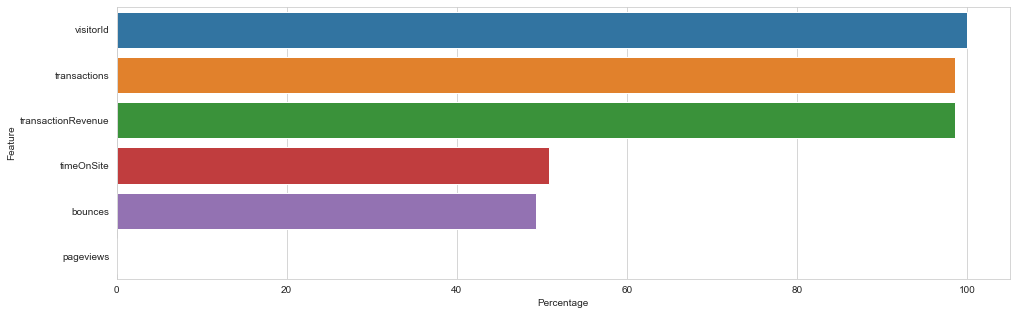

In [78]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

In [79]:
df.drop(labels=['visitorId'], axis=1, inplace= True)

In [80]:
df['transactions'].fillna(0, inplace= True)
#df['transactionRevenue'].fillna(0, inplace= True)
df['timeOnSite'].fillna(0, inplace= True)
df['bounces'].fillna(0, inplace= True)
#df['pageviews'].fillna(0, inplace= True)

In [81]:
check_missed_values(df)

,Feature,Percentage
0,transactionRevenue,98.564287
1,pageviews,0.022281


In [82]:
df['browser'].value_counts(normalize= True)

Chrome                                         0.695827
Safari                                         0.188871
Firefox                                        0.038560
Internet Explorer                              0.021264
Edge                                           0.013842
Android Webview                                0.012394
Opera Mini                                     0.008912
Safari (in-app)                                0.007951
Opera                                          0.004498
UC Browser                                     0.003495
YaBrowser                                      0.000947
Coc Coc                                        0.000724
Amazon Silk                                    0.000654
Mozilla Compatible Agent                       0.000599
Android Browser                                0.000571
Maxthon                                        0.000195
Puffin                                         0.000181
BlackBerry                                     0

In [83]:
df['source'].value_counts(normalize= True)

google                  0.534737
(direct)                0.276977
youtube.com             0.088440
analytics.google.com    0.027461
Partners                0.024899
                          ...   
search.tb.ask.com       0.000014
aol                     0.000014
it.pinterest.com        0.000014
es.search.yahoo.com     0.000014
arstechnica.com         0.000014
Name: source, Length: 97, dtype: float64

In [84]:
df.groupby(['source'])['bounces'].count()

source
(direct)                19890
Partners                 1788
adwords.google.com         16
amp.reddit.com              2
analytics.google.com     1972
                        ...  
wap.sogou.com               2
web.facebook.com            1
web.mail.comcast.net        1
yahoo                     100
youtube.com              6351
Name: bounces, Length: 97, dtype: int64

In [85]:
# Conversion Rate: Total number of sessions in which visitors make at least one transaction / Total number of Sessions
df[df['transactions'] != 0]['visitId'].nunique() / df['visitId'].nunique()

0.014628678452850536

In [86]:
df[df['transactions'] != 0].shape[0] / df['visitId'].shape[0] * 100

1.4357131915723218

In [87]:
session_bounce = df.groupby(['visitId']).agg({'visitId': 'count',
                             'bounces': 'sum'})
session_bounce.columns = ['number of visitor in the session','number of bouces']
session_bounce.reset_index(inplace= True)
session_bounce

,visitId,number of visitor in the session,number of bouces
0,1498892405,1,0.0
1,1498892513,1,1.0
2,1498892545,1,0.0
3,1498892549,1,0.0
4,1498892551,1,1.0
...,...,...,...
70473,1501570647,1,0.0
70474,1501570671,1,1.0
70475,1501570729,1,1.0
70476,1501570763,1,1.0


In [88]:
df[df['visitId'] == 1501523910]

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
3581,Chrome,1,1501523910,1501523910,20170731,1,1,1.0,0.0,1.0,0.0,NaN,google,655605807529233292
5173,Chrome,1,1501523910,1501523910,20170731,1,1,1.0,0.0,1.0,0.0,NaN,youtube.com,5786368627384864497


In [89]:
# Bounce rate:  Your site's Bounce Rate is the percentage of sessions that are bounces.
session_bounce[session_bounce['number of bouces'] != 0].shape[0] / session_bounce.shape[0]

0.51089701750901

In [90]:
df[df['bounces'] != 0].shape[0] / df['visitId'].shape[0] * 100

50.69836097533804

In [91]:
# Avg. session duration (seconds): The average time someone stayed on your site
df[df['timeOnSite'] != 0]

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
1130,Chrome,1,1499974639,1499974639,20170713,1,2,2.0,34.0,0.0,0.0,NaN,google,7455855752197768008
1131,Safari,1,1499968925,1499968925,20170713,1,2,2.0,24.0,0.0,0.0,NaN,google,6966124029616866474
1132,Chrome,1,1499976303,1499976303,20170713,1,2,2.0,118.0,0.0,0.0,NaN,(direct),6519717373226385672
1133,Chrome,2,1499940366,1499940366,20170713,1,2,2.0,642.0,0.0,0.0,NaN,google,0607751342903974935
1134,Safari,1,1499992574,1499992574,20170713,1,2,2.0,109.0,0.0,0.0,NaN,google,0423941431001576156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,1499360023,20170706,1,18,12.0,187.0,0.0,0.0,NaN,youtube.com,8636238363843235715
71808,Safari,1,1499409243,1499409243,20170706,1,22,15.0,382.0,0.0,0.0,NaN,m.youtube.com,2163624322857171652
71809,Chrome,2,1499357935,1499357935,20170706,1,23,22.0,916.0,0.0,0.0,NaN,youtube.com,7690948523840471251
71810,Chrome,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,0.0,0.0,NaN,youtube.com,3556380371648369739


In [92]:
df[df['timeOnSite'] != 0]['timeOnSite'].sum() / df[df['timeOnSite'] != 0]['visitId'].shape[0]

296.7820258474096

In [93]:
# Pages/session: The average number of pages viewed per session
df['pageviews'].sum() / df['visitId'].shape[0]

3.767570427928869

In [94]:
# Total sessions: the total number of sessions in month
df['visitStartTime'] + df['timeOnSite']
df['date'] = pd.to_datetime(df['date'].astype(str))
df['date']

0       2017-07-13
1       2017-07-13
2       2017-07-13
3       2017-07-13
4       2017-07-13
           ...    
71807   2017-07-06
71808   2017-07-06
71809   2017-07-06
71810   2017-07-06
71811   2017-07-06
Name: date, Length: 71811, dtype: datetime64[ns]

In [95]:
df['Year-Month'] = df['date'].dt.strftime('%Y-%m')
df['Year-Month']

0        2017-07
1        2017-07
2        2017-07
3        2017-07
4        2017-07
          ...   
71807    2017-07
71808    2017-07
71809    2017-07
71810    2017-07
71811    2017-07
Name: Year-Month, Length: 71811, dtype: object

In [96]:
df.groupby(['Year-Month'])['visitId'].count()

Year-Month
2017-07    71811
Name: visitId, dtype: int64

In [97]:
# % new sessions: The estimated percentage of first-time sessions
df[df['visitNumber'] == 1]['visitId'].nunique() / df['visitId'].nunique()

0.7641249751695565

In [98]:
df[df['visitNumber'] == 1].shape[0] / df['visitId'].shape[0] * 100

76.1443232930888

In [99]:
# Total visitors: total number of visitors in month
df.groupby(['Year-Month'])['fullVisitorId'].nunique()

Year-Month
2017-07    61262
Name: fullVisitorId, dtype: int64

In [100]:
# Total transactions:  total number of transactions in month
df.groupby(['Year-Month'])['transactions'].sum()

Year-Month
2017-07    1072.0
Name: transactions, dtype: float64

In [101]:
# Total revenue: total transaction revenue in month
df.groupby(['Year-Month'])['transactionRevenue'].sum()

Year-Month
2017-07    1.244993e+11
Name: transactionRevenue, dtype: float64

In [102]:
# % New versus returning visitors
visitor = pd.DataFrame(df.groupby(['fullVisitorId'])['visitId'].nunique())
visitor.columns = ['number_of_visit']
visitor.reset_index(inplace= True)
visitor[visitor['number_of_visit'] == 1].shape[0] / visitor[visitor['number_of_visit'] != 1].shape[0]

8.120440672919457

In [103]:
# Avg. Transaction Value
df['transactionRevenue'].sum() / df.shape[0]

1733707.6492459374

In [104]:
# Số lượng truy cập(rời bỏ) theo giờ trong ngày
df['visitEndTime'] = df['visitStartTime'] + df['timeOnSite']

df['visitStartTime'] = pd.to_datetime(df['visitStartTime'],unit='s')
df['visitEndTime'] = pd.to_datetime(df['visitEndTime'],unit='s')

0       2017-07-13 12:32:24
1       2017-07-13 12:26:02
2       2017-07-13 10:09:38
3       2017-07-14 02:41:36
4       2017-07-13 18:19:18
                ...        
71807   2017-07-06 16:53:43
71808   2017-07-07 06:34:03
71809   2017-07-06 16:18:55
71810   2017-07-06 11:33:47
71811   2017-07-07 04:43:52
Name: visitStartTime, Length: 71811, dtype: datetime64[ns]

In [105]:
# số lượng truy cập theo giờ
df['visitStartTime_Hour'] = df['visitStartTime'].dt.hour

vistor_per_hour = df.groupby(['visitStartTime_Hour'])['visitId'].count().to_frame().reset_index()
vistor_per_hour

,visitStartTime_Hour,visitId
0,0,2826
1,1,2721
2,2,2659
3,3,2555
4,4,2640
5,5,2510
6,6,2545
7,7,2587
8,8,2494
9,9,2227


In [117]:
# số lượng rời bỏ theo giờ
df['visitEndTime_Hour'] = df['visitEndTime'].dt.hour
vistor_per_hour = df.groupby(['visitEndTime_Hour'])['visitId'].count().to_frame().reset_index()
vistor_per_hour

,visitEndTime_Hour,visitId
0,0,2818
1,1,2743
2,2,2627
3,3,2584
4,4,2632
5,5,2524
6,6,2638
7,7,2500
8,8,2496
9,9,2245


In [126]:
def section(x):
    if x in [5, 6, 7, 8, 9, 10, 11]:
        return 'Morning'
    elif x in [12, 13, 14, 15, 16, 17]:
        return 'Afternoon'
    elif x in [18, 19, 20, 21]:
        return 'Evening'
    else:
        return 'Night'

In [127]:
df['Start_Section'] = df['visitStartTime_Hour'].apply(section)
df['End_Section'] = df['visitEndTime_Hour'].apply(section)

In [128]:
df.groupby(['Start_Section'])['visitId'].count().to_frame().reset_index()

,Start_Section,visitId
0,Afternoon,20664
1,Evening,14873
2,Morning,16895
3,Night,19379


In [129]:
df.groupby(['End_Section'])['visitId'].count().to_frame().reset_index()

,End_Section,visitId
0,Afternoon,20554
1,Evening,14878
2,Morning,16940
3,Night,19439


In [106]:
# Tổng số lượng truy cập theo các ngày trong tháng(nếu thể hiện được ngày đó là thứ mấy trong tuần thì sẽ nhìn rõ pattern là lượng truy cập có đạt đỉnh vào một ngày nhất định nào trong tuần không?)
day_of_week = { 0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['visitStartTime_Day0fWeek'] = df['visitStartTime'].dt.dayofweek.map(day_of_week)
df

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId,Year-Month,visitEndTime,visitStartTime_Hour,visitStartTime_Day0fWeek
0,Safari,1,1499949144,2017-07-13 12:32:24,2017-07-13,1,1,1.0,0.0,1.0,0.0,NaN,google,6790377449422493910,2017-07,2017-07-13 12:32:24,12,Thu
1,Chrome,1,1499948762,2017-07-13 12:26:02,2017-07-13,1,1,1.0,0.0,1.0,0.0,NaN,google,1431348163667504299,2017-07,2017-07-13 12:26:02,12,Thu
2,Chrome,7,1499940578,2017-07-13 10:09:38,2017-07-13,1,1,1.0,0.0,1.0,0.0,NaN,google,5628749752915535966,2017-07,2017-07-13 10:09:38,10,Thu
3,Chrome,1,1500000096,2017-07-14 02:41:36,2017-07-13,1,1,1.0,0.0,1.0,0.0,NaN,(direct),7721996906492012430,2017-07,2017-07-14 02:41:36,2,Fri
4,Chrome,1,1499969958,2017-07-13 18:19:18,2017-07-13,1,1,1.0,0.0,1.0,0.0,NaN,google,2699850580029059099,2017-07,2017-07-13 18:19:18,18,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,2017-07-06 16:53:43,2017-07-06,1,18,12.0,187.0,0.0,0.0,NaN,youtube.com,8636238363843235715,2017-07,2017-07-06 16:56:50,16,Thu
71808,Safari,1,1499409243,2017-07-07 06:34:03,2017-07-06,1,22,15.0,382.0,0.0,0.0,NaN,m.youtube.com,2163624322857171652,2017-07,2017-07-07 06:40:25,6,Fri
71809,Chrome,2,1499357935,2017-07-06 16:18:55,2017-07-06,1,23,22.0,916.0,0.0,0.0,NaN,youtube.com,7690948523840471251,2017-07,2017-07-06 16:34:11,16,Thu
71810,Chrome,1,1499340827,2017-07-06 11:33:47,2017-07-06,1,26,24.0,1598.0,0.0,0.0,NaN,youtube.com,3556380371648369739,2017-07,2017-07-06 12:00:25,11,Thu


In [107]:
df['visitStartTime_Day0fWeek'].value_counts(normalize= False).reset_index()

,index,visitStartTime_Day0fWeek
0,Mon,12209
1,Wed,10637
2,Tue,10601
3,Thu,10542
4,Fri,10173
5,Sun,8837
6,Sat,8812


In [108]:
# Biểu đồ biến động về tổng số transaction và tổng số revenue theo ngày(dual axis)
df['visitStartTime_Day'] = df['visitStartTime'].dt.day
df['visitStartTime_Day']

0        13
1        13
2        13
3        14
4        13
         ..
71807     6
71808     7
71809     6
71810     6
71811     7
Name: visitStartTime_Day, Length: 71811, dtype: int64

In [109]:
df.groupby(['visitStartTime_Day']).agg({'transactions':'sum',
                                        'transactionRevenue': 'sum'}).reset_index()

,visitStartTime_Day,transactions,transactionRevenue
0,1,15.0,2.088200e+09
1,2,7.0,6.082900e+08
2,3,11.0,9.515100e+08
3,4,11.0,5.934800e+08
4,5,34.0,7.694400e+09
5,6,35.0,3.786020e+09
6,7,39.0,4.736200e+09
7,8,18.0,5.713800e+08
8,9,17.0,5.630500e+08
9,10,46.0,4.486800e+09


In [130]:
def source_classify(source):
    if re.findall('google', source):
        return 'google'
    elif re.findall('(direct)', source):
        return '(direct)'
    else:
        return 'Partners and other agency'


In [131]:
df['source_agency'] = df['source'].apply(source_classify)
df['source_agency'].value_counts()

google                       41333
(direct)                     19890
Partners and other agency    10588
Name: source_agency, dtype: int64

In [132]:
source_agency_bounces_df = pd.DataFrame(df.groupby(['source_agency'])['bounces'].value_counts(normalize= True))
source_agency_bounces_df.columns = ['Rate']
source_agency_bounces_df.reset_index(inplace= True)
source_agency_bounces_df[source_agency_bounces_df['bounces'] == 1]

,source_agency,bounces,Rate
1,(direct),1.0,0.432629
2,Partners and other agency,1.0,0.613714
4,google,1.0,0.515424


In [133]:
source_agency_bounces_df

,source_agency,bounces,Rate
0,(direct),0.0,0.567371
1,(direct),1.0,0.432629
2,Partners and other agency,1.0,0.613714
3,Partners and other agency,0.0,0.386286
4,google,1.0,0.515424
5,google,0.0,0.484576


In [134]:
df.groupby(['source_agency'])['transactions'].sum()

source_agency
(direct)                     684.0
Partners and other agency     17.0
google                       371.0
Name: transactions, dtype: float64

In [136]:
df['conversion_flag'] = df['transactions'].apply(lambda x: 0 if x == 0 else 1)

In [137]:
source_agency_conversion_rate_df = pd.DataFrame(df.groupby(['source_agency'])['conversion_flag'].value_counts(normalize= True))
source_agency_conversion_rate_df.columns = ['Percentage']
source_agency_conversion_rate_df.reset_index(inplace= True)
source_agency_conversion_rate_df[source_agency_conversion_rate_df['conversion_flag'] == 1]

,source_agency,conversion_flag,Percentage
1,(direct),1,0.032831
3,Partners and other agency,1,0.001511
5,google,1,0.008758
